<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/EJERCICIO1_3P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 1

1. Graficamente podemos observar que:

$$a= 190 , b=230, c=210$$

2. Definimos nuestra funsión de densidad

$$
f(x) =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    0 & \text{si } x < 190, \\
    \frac{2(x-190)}{800} & \text{si } 190 \leq x \leq 210, \\
    \frac{2(230 - x)}{800} & \text{si } 210 < x \leq 230, \\
    0 & \text{si } x > 230
\end{array}
\right.
\end{array}
$$

3. Queremos calcular la probabilida de

$$ P (\sum_{i=1}^{5} x_i > 1000 )$$

para  encontrar  la  probabilidad  de  que  la  suma  de  los  pesos  de  5  tinas exceda la capacidad del camión, en este caso $x_i$ representa el peso de la tina, por lo que si dividimos nuestra probabilidad anterior en 5, la capacidad de cada tina correspondera a la probabilidad siguiente:

$$ P( x > 200)$$

El teorema del limite central que nos dice que cuando la población muestrada es aproximadamente simetrica, la distribución muestral de $\bar{x}$ se  proxima a una distribución normal para valores relativamente pequeños de $n$ , en este caso para $n=5$, con media $\mu$ y desviasión estándar $\frac{\theta}{\sqrt{n}}$

4. Calculamos la media

$$ \mu =  \frac{a+b+c}{3} = \frac{190+230+210}{3} = 210$$

5. Calculamos la varianza

$$ \sigma^2 =  \frac{a^2+b^2+c^2-ab-ac-bc}{18} $$ $$ = \frac{(190)^2+(230)^2+(210)^2-(190)(230)-(190)(210)-(230)(210)}{18} $$ $$= \frac{200}{3} \approx{66.7} $$

6. Dado que se aproxima a una normal, tendremos que

\begin{document}

\begin{align*}
P\left( \bar{x} > 200 \right) &= P\left( \bar{x} - \mu > 200 \right) \\
&= P\left( \frac{\bar{x} - \mu}{\sigma}\sqrt{n} > 200 \right) \\
&= P\left( \frac{\bar{x} - \mu}{\sigma} \sqrt{n}  > \frac{\bar{x} - \mu}{\sigma}\sqrt{n} \right) \\
&= P\left( Z > \frac{\bar{x} - \mu}{\sigma}\sqrt{5} \right)
\end{align*}

7. Sustituyendo valores tenomos que:

\begin{align*}
P\left( Z > \frac{\bar{x} - \mu}{\sigma}\sqrt{5} \right) &= P\left( Z > \frac{200 - 210}{\sqrt{66.7}}\sqrt{5} \right) \\
&= P(Z > -2.73) \\
&= 1 - P(Z < -2.73) \\
&= 1 - 0.0031 \\
&= 0.9969
\end{align*}

* Para simular esto, definiremos nuestra funsión acumulada

$$
F(x) =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    0 & \text{si } x \leq 190, \\
  \frac{(x-190)^2}{800} & \text{si } 190 \leq x \leq 210, \\
    1- \frac{(230-x)^2}{800} & \text{si } 210 < x \leq 230, \\
    1 & \text{si } 230 \leq x
\end{array}
\right.
\end{array}
$$

* Despejamos $x$ de nuestra funsión en partes:

Caso 1:

$$ \frac{(x-190)^2}{800} = u $$
$$ ⟹  (x-190)^2 = 800u $$
$$ ⟹  x = \sqrt{800u} + 190 $$

Caso 2:

$$1- \frac{(230-x)^2}{800} = u$$
$$ ⟹ - \frac{(230-x)^2}{800} = u-1$$
$$ ⟹ (-230+x)^2 = 800(u-1) $$
$$ ⟹ x= -\sqrt{800(1-u)}+230 $$

* Asi nuestra inversa es:
$$
F(x)^{-1} =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    \sqrt{800u} + 190 & \text{si } 0 \leq x \leq 0.5, \\
    -\sqrt{800(1-u)}+230 & \text{si } 0.5 < x \leq 1, \\
\end{array}
\right.
\end{array}
$$

In [6]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math

In [69]:
def probtria(n):
    Lista = []
    for i in range(n):
     j=0
    for j in range(5):
       u=rnd.random()
       if  u <= 0.5:
          x =(800*u)**0.5 + 190
       else:
          x=230-(800*(1-u))**0.5
    Lista.append(x)
    return Lista

In [70]:
G=probtria(100000)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([220.95911247, 220.97911247, 220.99911247, 221.01911247,
        221.03911247, 221.05911247, 221.07911247, 221.09911247,
        221.11911247, 221.13911247, 221.15911247, 221.17911247,
        221.19911247, 221.21911247, 221.23911247, 221.25911247,
        221.27911247, 221.29911247, 221.31911247, 221.33911247,
        221.35911247, 221.37911247, 221.39911247, 221.41911247,
        221.43911247, 221.45911247, 221.47911247, 221.49911247,
        221.51911247, 221.53911247, 221.55911247, 221.57911247,
        221.59911247, 221.61911247, 221.63911247, 221.65911247,
        221.67911247, 221.69911247, 221.71911247, 221.73911247,
        221.75911247, 221.77911247, 221.79911247, 221.81911247,
        221.83911247, 221.85911247, 221.87911247, 221.89911247,
      

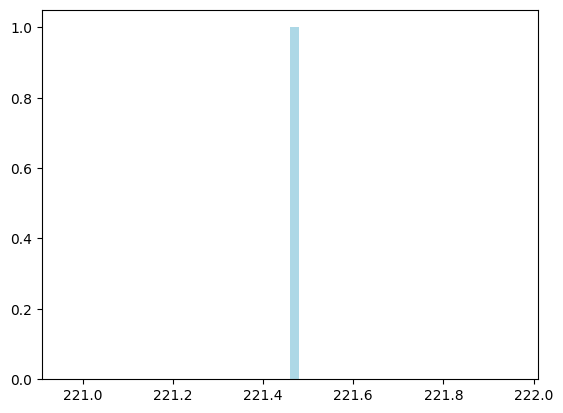

In [71]:
plt.hist(G, bins=50, color='lightblue')